## **Import Library**

In [ ]:
import matplotlib.pyplot as plt
import opendatasets as od
import preprocessor as p
import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
import re
import string
import nltk

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from matplotlib import style\
style.use("ggplot")

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [2]:
od.download("https://www.kaggle.com/crowdflower/twitter-airline-sentiment")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  kurniadiahmadwijaya


Your Kaggle Key:

  ································


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.55M/2.55M [00:00<00:00, 19.7MB/s]

In [209]:
df = pd.read_csv("twitter-airline-sentiment/Tweets.csv")
print(f'Jumlah Dataset : {len(df)}\n')
df.sample(5)

Jumlah Dataset : 14640



,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1934,569514124490579969,neutral,0.6365,NaN,0.0000,United,NaN,roryfreeman87,NaN,0,@united with about 25 people trying to get on ...,"[29.98872603, -95.3384666]",2015-02-22 07:08:42 -0800,california,Central Time (US & Canada)
1537,569676535973744640,negative,0.6889,Customer Service Issue,0.3549,United,NaN,halestorm62,NaN,0,@united good try but @SouthwestAir got her her...,NaN,2015-02-22 17:54:04 -0800,NaN,Quito
12791,570021054015541248,negative,0.6659,Can't Tell,0.6659,American,NaN,djjohnpayne,NaN,0,@AmericanAir No. It does. You could not be mor...,NaN,2015-02-23 16:43:04 -0800,"Las Vegas, NV",Pacific Time (US & Canada)
5393,569149949989879808,negative,1.0000,Customer Service Issue,0.6879,Southwest,NaN,UnprovenTheory,NaN,0,@SouthwestAir Cancelled Flightled my flight wi...,NaN,2015-02-21 07:01:37 -0800,NaN,NaN
12964,569972777593262080,negative,1.0000,Cancelled Flight,1.0000,American,NaN,StephanSDalal,NaN,0,@AmericanAir Miami-PhL flight Cancelled Flight...,NaN,2015-02-23 13:31:14 -0800,NaN,NaN


In [210]:
df = df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


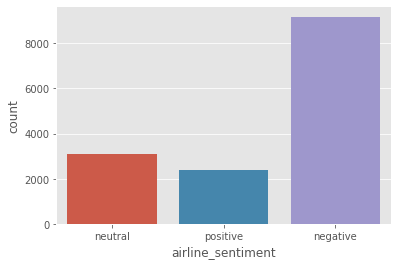

In [211]:
sns.countplot(x='airline_sentiment', data=df)
plt.show()

## **Preprocessing Data**

In [212]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def cleansing(text):
    # Memisahkan Kata Singkatan (Abbreviaton). Contoh won't -> will not 
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    # Mengubah setiap kata menjadi lowercase
    text =  text.lower() 

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Tag HTML
    text = re.sub('<.*?>', '', text)

    # Menghapus Tanda Baca Seperti Titik Dan Koma
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Karakter Berulang (Contoh: Horeeee!!!! menjadi Hore!)
    text = re.sub(r'(\w)(\1{2,})', r"\1", text)

    # Menghapus 1 Karakter Terpisah
    text = re.sub(r"\b[a-zA-Z]\b", "", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)
    
    # Menghapus kata yang mengandung judul topik dan kata yang terdapat pada stopwords nltk 
    temp_text_split = []
    text_split = text.split(' ')

    for i in range(len(text_split)):
        if text_split[i] not in stop_words and len(text_split) > 3:
            temp_text_split.append(text_split[i])
    
    temp_text_split = list(set(temp_text_split))
    text = ' '.join(temp_text_split)
    
    # Mengembalikan Hasil Preprocessing Text
    return str.lstrip(text)


df['text'] = df['text'].apply(cleansing)

In [213]:
df['text'].sample(10).values

array(['obviously tweet get computers making sarcasm people bots real like',
       'united helping mexico terrible call attitude care lady office city take center hello',
       'freaks cattle delay leaves surreal engers attendant treatment flight aircraft react pa aa',
       'kind appreciate dm ur roberto code forward words confirmation',
       'thanks conection catch',
       'fees lake flight service waives refuses angry gives jana gold desk wrong premier salt acosta changes',
       'xm get rid stations sirius hip guys hop', '',
       'exact taking time good flighted cancelled delta runway flight claimed phl',
       'anticipate flights tomorrow cancelled nashville flightlations thank'],
      dtype=object)

In [214]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [215]:
max_features = 1000

token = Tokenizer(num_words=max_features, split = ' ')
token.fit_on_texts(df['text'].values)

x = token.texts_to_sequences(df['text'].values)
x = pad_sequences(x)
x

array([[  0,   0,   0, ...,   0,   0, 124],
       [  0,   0,   0, ..., 938, 107, 394],
       [  0,   0,   0, ...,  32,  66,  67],
       ...,
       [  0,   0,   0, ...,  17, 153, 483],
       [  0,   0,   0, ...,  50,   1, 211],
       [  0,   0,   0, ...,   1, 782,  39]], dtype=int32)

In [216]:
y = pd.get_dummies(df['airline_sentiment']).values

In [217]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Membuat Model LSTM**

In [218]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from keras.models import Sequential

In [219]:
embed_dim = 128
lstm_out = 72

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = x.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
]

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=METRICS
)

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 17, 128)           128000    
                                                                 
 spatial_dropout1d_13 (Spati  (None, 17, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_14 (LSTM)              (None, 72)                57888     
                                                                 
 dense_25 (Dense)            (None, 32)                2336      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                     

In [220]:
!nvidia-smi -L

GPU 0: A100-SXM4-40GB (UUID: GPU-42307e29-459e-0f8a-4ec7-a32ddbc65184)


## **Train Model**

In [221]:
batch_size = 32

history = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test),
    epochs=10, 
    batch_size=batch_size, 
    verbose=2
)

Epoch 1/10
366/366 - 12s - loss: 0.8308 - accuracy: 0.6519 - precision: 0.7746 - recall: 0.4460 - auc: 0.8113 - val_loss: 0.6406 - val_accuracy: 0.7258 - val_precision: 0.8371 - val_recall: 0.6247 - val_auc: 0.8923 - 12s/epoch - 34ms/step
Epoch 2/10
366/366 - 10s - loss: 0.6810 - accuracy: 0.7246 - precision: 0.8197 - recall: 0.5818 - auc: 0.8793 - val_loss: 0.6072 - val_accuracy: 0.7640 - val_precision: 0.8316 - val_recall: 0.6660 - val_auc: 0.9055 - 10s/epoch - 29ms/step
Epoch 3/10
366/366 - 10s - loss: 0.6312 - accuracy: 0.7553 - precision: 0.8194 - recall: 0.6452 - auc: 0.8974 - val_loss: 0.5740 - val_accuracy: 0.7729 - val_precision: 0.8143 - val_recall: 0.7292 - val_auc: 0.9142 - 10s/epoch - 28ms/step
Epoch 4/10
366/366 - 10s - loss: 0.6026 - accuracy: 0.7662 - precision: 0.8168 - recall: 0.6816 - auc: 0.9053 - val_loss: 0.5643 - val_accuracy: 0.7763 - val_precision: 0.8089 - val_recall: 0.7329 - val_auc: 0.9174 - 10s/epoch - 29ms/step
Epoch 5/10
366/366 - 10s - loss: 0.5865 - ac

## **Model Evaluation**

In [222]:
loss, accuracy, precision, recall, auc = model.evaluate(x_test, y_test)

92/92 [==============================] - 1s 7ms/step - loss: 0.5671 - accuracy: 0.7811 - precision: 0.8175 - recall: 0.7418 - auc: 0.9200


In [223]:
history = history.history

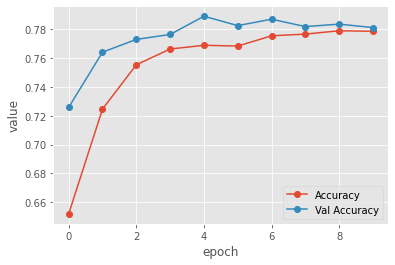

In [224]:
plt.plot(history['accuracy'], label="Accuracy", marker = "o")
plt.plot(history['val_accuracy'], label="Val Accuracy", marker = "o")
plt.xlabel("epoch")
plt.ylabel("value")
plt.legend()
plt.show()

## **Prediksi Kalimat**

In [243]:
def predict(comment):
    text = [cleansing(comment)]
    text = token.texts_to_sequences(text)
    text = pad_sequences(text, maxlen=17)

    predict = model.predict(text)

    if np.argmax(predict) == 0:
        print(f'Kalimat "{comment}" merupakan Komentar Netral')
    elif np.argmax(predict) == 1:
        print(f'Kalimat "{comment}" merupakan Komentar Negatif')
    elif np.argmax(predict) == 2:
        print(f'Kalimat "{comment}" merupakan Komentar Positif')

In [244]:
predict('the flight was great, i enjoying the flight')

Kalimat "the flight was great, i enjoying the flight" merupakan Komentar Positif


In [245]:
predict('the flight is not bad')

Kalimat "the flight is not bad" merupakan Komentar Netral


In [248]:
predict('i will not take flight with it again, they cancel my flight so sudden')

Kalimat "i will not take flight with it again, they cancel my flight so sudden" merupakan Komentar Negatif
